<a href="https://colab.research.google.com/github/piero0090/Tesis-SeminarioII/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importación de librerías** ⏺

In [1]:
# Tratamiento de datos
# =========================================================================
import numpy as np
import pandas as pd
# Gráficos
# =========================================================================
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocesado y modelado
# =========================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
# Configuración warnings
# =========================================================================
import warnings
warnings.filterwarnings('ignore')
# =========================================================================
plt.style.use('ggplot')
#pd.set_option('max_columns',200)
pd.options.display.max_columns = 200
from itertools import cycle, islice
from sklearn.datasets import make_circles

# **Lecturas de datos** ✅

In [2]:
datos = pd.read_csv('/content/DatosII.csv')
datos.head()

,Nombre,Altura,Nac,Sueldo neto,Club,División,Edad,Posición,Valor de traspaso,Vis,Vel,Val,1v1,Lib,Lej,Téc,Tal,Ser,Sq L,Pue,Cór,Saq,SAL,Sac,Res,Rem,Reg,Ref,Fís,Pen,Pas,Mar,Mdo,Lid,JEq,Puñ,Fue,Exc,Equ,Ent,Det,Dmq,Dec,Ctr,Cnc,Com,Col,Cen,Cab,Blo,Ant,Sal2,Aér,Agr,Agi,Ace,Rec,Inf,RM
0,Alexandre Lacazette,175 cm,FRA,490.000 € p/m,Arsenal,Premier Division inglesa,30,DL (C),25M € - 30M €,12,12,14,1,11,13,15,15,14,3,2,5,3,3,17,14,15,14,3,15,14,12,5,3,12,15,4,14,3,15,5,12,16,14,15,14,2,7,11,13,2,15,10,1,10,15,14,- - -,Est,NaN
1,André Onana,192 cm,CMR,74.000 € p/m,Ajax,Eredivisie,25,POR,20M € - 29M €,8,13,15,15,9,2,12,14,15,2,15,4,15,16,13,13,3,2,15,16,3,13,3,14,12,12,5,13,15,15,2,15,2,14,10,14,13,15,2,5,15,13,16,15,9,15,12,- - -,San,NaN
2,Pavel Kadeřábek,182 cm,CZE,93.000 € p/m,Hoffenheim,Bundesliga,29,DF/CR/ME/MP (D),"7,6M € - 9,4M €",10,16,15,1,7,11,10,10,8,15,2,7,2,4,16,17,9,11,3,14,11,10,11,3,12,14,3,14,4,16,13,16,14,9,10,13,2,11,14,11,2,10,11,2,13,11,14,- - -,Seg,NaN
3,Richarlison,181 cm,BRA,297.000 € p/m,Everton,Premier Division inglesa,24,"MP (DI), DL (C)",83M € - 119M €,10,15,13,2,9,11,15,14,12,8,3,10,3,1,16,17,14,15,3,15,12,12,6,2,9,12,3,13,1,12,12,14,14,10,13,12,2,10,11,14,3,12,11,2,15,14,15,- - -,Seg,NaN
4,Bernd Leno,190 cm,GER,270.000 € p/m,Arsenal,Premier Division inglesa,29,POR,27M € - 32M €,7,10,14,17,5,3,9,4,11,2,15,2,12,16,10,12,2,2,17,14,1,10,2,14,9,16,13,12,13,14,2,14,6,10,10,12,12,13,1,6,15,14,14,13,8,16,13,- - -,Est,NaN


In [3]:
datos.describe()

,Edad,Vis,Vel,Val,1v1,Lib,Lej,Téc,Tal,Ser,Sq L,Pue,Cór,Saq,SAL,Sac,Res,Rem,Reg,Ref,Fís,Pen,Pas,Mar,Mdo,Lid,JEq,Puñ,Fue,Exc,Equ,Ent,Det,Dmq,Dec,Ctr,Cnc,Com,Col,Cen,Cab,Blo,Ant,Sal2,Aér,Agr,Agi,Ace,RM
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.00000,0.0
mean,20.122675,8.438825,11.522349,9.229690,2.956281,5.895595,6.779445,9.611746,8.304405,8.680261,4.745514,3.031974,5.752039,2.829690,3.039478,10.057096,9.360848,6.903100,7.900816,3.312561,12.419902,5.453507,9.745188,7.207178,2.978467,7.699184,9.277325,2.988581,7.904731,2.663622,8.908646,8.289396,11.176509,8.112561,11.005873,10.044698,8.582055,2.855791,8.449918,6.677325,8.065905,3.245677,9.201631,9.492659,3.128548,10.472431,11.338010,11.80783,NaN
std,4.951655,3.519378,2.362036,3.730751,2.799206,3.308674,3.655395,3.738777,3.892945,3.592159,3.320731,2.863568,3.214866,2.496675,2.905621,3.545168,4.000526,3.886032,4.338630,3.553607,2.685822,3.843530,3.128972,3.940792,2.720953,3.604041,3.722693,2.849500,3.991022,2.048545,3.680643,4.365420,4.164593,4.108283,2.486510,3.528922,3.438931,2.528445,3.572842,3.871967,3.945562,3.279317,3.356115,3.556981,3.149317,3.149346,2.323806,2.34881,NaN
min,15.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.00000,NaN
25%,16.000000,6.000000,10.000000,7.000000,1.000000,4.000000,4.000000,7.000000,5.000000,6.000000,2.000000,1.000000,3.000000,1.000000,1.000000,7.000000,6.000000,4.000000,4.000000,1.000000,11.000000,2.000000,7.000000,4.000000,1.000000,5.000000,6.000000,1.000000,5.000000,1.000000,6.000000,5.000000,8.000000,5.000000,9.000000,8.000000,6.000000,1.000000,6.000000,3.000000,5.000000,1.000000,7.000000,7.000000,1.000000,8.000000,10.000000,11.00000,NaN
50%,18.000000,9.000000,12.000000,9.000000,2.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,2.000000,5.000000,2.000000,2.000000,10.000000,10.000000,7.000000,8.000000,2.000000,13.000000,5.000000,10.000000,7.000000,2.000000,8.000000,8.000000,2.000000,7.000000,2.000000,8.000000,9.000000,12.000000,8.000000,12.000000,11.000000,9.000000,2.000000,8.000000,7.000000,8.000000,2.000000,9.000000,9.000000,2.000000,11.000000,12.000000,12.00000,NaN
75%,23.000000,11.000000,13.000000,12.000000,3.000000,8.000000,10.000000,12.000000,12.000000,12.000000,7.000000,3.000000,7.000000,3.000000,3.000000,13.000000,13.000000,10.000000,12.000000,3.000000,14.000000,8.000000,12.000000,10.000000,3.000000,10.000000,13.000000,3.000000,11.000000,3.000000,12.000000,12.000000,14.000000,12.000000,13.000000,13.000000,11.000000,3.000000,12.000000,10.000000,11.000000,3.000000,12.000000,12.000000,3.000000,13.000000,13.000000,13.00000,NaN
max,40.000000,18.000000,18.000000,20.000000,17.000000,18.000000,17.000000,18.000000,20.000000,18.000000,19.000000,17.000000,18.000000,17.000000,19.000000,20.000000,19.000000,17.000000,17.000000,18.000000,20.000000,20.000000,17.000000,16.000000,17.000000,20.000000,19.000000,18.000000,19.000000,17.000000,19.000000,18.000000,20.000000,19.000000,17.000000,17.000000,18.000000,18.000000,16.000000,17.000000,19.000000,16.000000,18.000000,20.000000,19.000000,20.000000,18.000000,20.00000,NaN


# **Transformación del dataset** 🔼

In [4]:
#Eliminar columnas inncesarias
datos.drop(['RM','Inf','Rec'],axis=1, inplace=True)

In [5]:
#Guardar columnas datos informativos.
#datosInf=datos.drop(columns=datos.iloc[:,9:])
#datosInf.head()

In [6]:
#Transformar datos informativos
#Cambio de nombre a las Ligas
div1=['Serie A','Premier League','Ligue 1','La Liga','Bundesliga','La Liga',
      'Eredivisie']
div2=['Serie A italiana','Premier Division inglesa','Ligue 1 Uber Eats',
      'Primera División Federación B española','Bundesliga',
      'Primera División Federación A española','Eredivisie']
datos['División']=datos['División'].replace(div2,div1)

In [7]:
#Cambio de formato columna de Altura
datos['Altura'] = datos['Altura'].str.extract('(\d+)').astype(int)

In [8]:
#Cambio de formato de sueldo neto
datos['Sueldo neto'] = datos['Sueldo neto'].replace('N/D',np.nan)
datos['Sueldo neto'].fillna(method='ffill',inplace=True)

In [9]:
#Elimar filas inncesarias de Valor de traspaso
datos.drop(datos[(datos['Valor de traspaso']=='0 €')|(datos['Valor de traspaso']=='No a la venta')].index, inplace=True)

In [10]:
datos.head()

,Nombre,Altura,Nac,Sueldo neto,Club,División,Edad,Posición,Valor de traspaso,Vis,Vel,Val,1v1,Lib,Lej,Téc,Tal,Ser,Sq L,Pue,Cór,Saq,SAL,Sac,Res,Rem,Reg,Ref,Fís,Pen,Pas,Mar,Mdo,Lid,JEq,Puñ,Fue,Exc,Equ,Ent,Det,Dmq,Dec,Ctr,Cnc,Com,Col,Cen,Cab,Blo,Ant,Sal2,Aér,Agr,Agi,Ace
0,Alexandre Lacazette,175,FRA,490.000 € p/m,Arsenal,Premier League,30,DL (C),25M € - 30M €,12,12,14,1,11,13,15,15,14,3,2,5,3,3,17,14,15,14,3,15,14,12,5,3,12,15,4,14,3,15,5,12,16,14,15,14,2,7,11,13,2,15,10,1,10,15,14
1,André Onana,192,CMR,74.000 € p/m,Ajax,Eredivisie,25,POR,20M € - 29M €,8,13,15,15,9,2,12,14,15,2,15,4,15,16,13,13,3,2,15,16,3,13,3,14,12,12,5,13,15,15,2,15,2,14,10,14,13,15,2,5,15,13,16,15,9,15,12
2,Pavel Kadeřábek,182,CZE,93.000 € p/m,Hoffenheim,Bundesliga,29,DF/CR/ME/MP (D),"7,6M € - 9,4M €",10,16,15,1,7,11,10,10,8,15,2,7,2,4,16,17,9,11,3,14,11,10,11,3,12,14,3,14,4,16,13,16,14,9,10,13,2,11,14,11,2,10,11,2,13,11,14
3,Richarlison,181,BRA,297.000 € p/m,Everton,Premier League,24,"MP (DI), DL (C)",83M € - 119M €,10,15,13,2,9,11,15,14,12,8,3,10,3,1,16,17,14,15,3,15,12,12,6,2,9,12,3,13,1,12,12,14,14,10,13,12,2,10,11,14,3,12,11,2,15,14,15
4,Bernd Leno,190,GER,270.000 € p/m,Arsenal,Premier League,29,POR,27M € - 32M €,7,10,14,17,5,3,9,4,11,2,15,2,12,16,10,12,2,2,17,14,1,10,2,14,9,16,13,12,13,14,2,14,6,10,10,12,12,13,1,6,15,14,14,13,8,16,13


In [11]:
#Datos finales para modelo de ML
datosML = datos.drop(columns=datos.iloc[:,0:9])

In [12]:
#Renombrando columnas
datosML.rename(columns={'Vis':'X1','Vel':'X2','Val':'X3','1v1':'X4','Lib':'X5',
                        'Lej':'X6','Téc':'X7','Tal':'X8','Ser':'X9','Sq L':'X10',
                        'Pue':'X11','Cór':'X12','Saq':'X13','SAL':'X14',
                        'Sac':'X15','Res':'X16','Rem':'X17','Reg':'X18','Ref':'X19',
                        'Fís':'X20','Pen':'X21','Pas':'X22','Mar':'X23','Mdo':'X24',
                        'Lid':'X25','JEq':'X26','Puñ':'X27','Fue':'X28','Exc':'X29',
                        'Equ':'X30','Ent':'X31','Det':'X32','Dmq':'X33','Dec':'X34',
                        'Ctr':'X35','Cnc':'X36','Com':'X37','Col':'X38','Cen':'X39',
                        'Cab':'X40','Blo':'X41','Ant':'X42','Sal2':'X43','Aér':'X44',
                        'Agr':'X45','Agi':'X46','Ace':'X47'},inplace=True)

# **Pre-procesamiento de datos** 💯

In [13]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datosML)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [14]:
list_names = [f'PC{i}' for i in range (1,48)]
#df_datos = pd.DataFrame(dt, columns=list_names)

In [15]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datosML.columns,
    index   = list_names
)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47
PC1,-0.175317,-0.138899,-0.085249,0.133733,-0.146004,-0.194011,-0.195274,-0.168661,-0.172060,-0.152686,0.144989,-0.175819,0.129341,0.143534,-0.188742,-0.187783,-0.162788,-0.191525,0.153709,-0.047116,-0.181727,-0.158396,-0.123728,0.139617,-0.081306,-0.176892,0.144649,-0.141254,0.122231,-0.167868,-0.121635,-0.071302,-0.200043,-0.026751,-0.182950,-0.120049,0.130027,-0.066729,-0.197171,-0.135996,0.154981,-0.151453,-0.017432,0.146725,-0.072778,-0.089790,-0.114017
PC2,0.097219,0.004190,0.234985,0.236706,0.116763,0.009418,0.022959,-0.033546,0.154687,0.063832,0.227315,0.047283,0.233670,0.218127,0.108506,0.102798,-0.035132,-0.016578,0.230067,0.068670,0.085467,0.105801,-0.009013,0.230349,0.115747,0.177319,0.213196,0.195880,0.197885,0.177255,-0.027391,0.091904,0.014799,0.105403,-0.032690,0.220801,0.230864,0.168303,0.023414,-0.015609,0.223026,0.180182,0.173278,0.227609,0.049277,0.088920,-0.017477
PC3,-0.106357,-0.084219,0.137934,-0.073172,-0.190910,-0.114458,-0.169141,-0.227412,-0.030177,0.124097,-0.077230,-0.158968,-0.072025,-0.078244,0.033986,0.042046,-0.219090,-0.199906,-0.077560,0.035008,-0.095713,-0.075934,0.364084,-0.077398,0.114020,0.055719,-0.076481,0.134825,-0.068835,0.051719,0.346782,0.021265,-0.140223,0.154497,-0.139859,0.109842,-0.073657,0.310943,-0.108785,0.214285,-0.076658,0.085900,0.188816,-0.075213,0.139379,-0.138509,-0.142951
PC4,-0.174438,-0.240335,0.013686,-0.004664,0.041579,-0.008909,-0.051608,0.102865,0.129434,-0.062504,-0.007048,-0.051879,-0.006618,-0.003021,-0.137248,-0.020304,0.324128,0.124130,-0.012172,-0.035925,0.212113,-0.248312,-0.110202,-0.006720,0.074592,-0.056027,-0.011618,0.185138,-0.011358,0.066394,-0.237354,-0.018591,0.152484,-0.189202,-0.050106,-0.003740,-0.008679,-0.062777,-0.086354,0.384953,-0.007470,0.104419,0.292916,0.003606,-0.047525,-0.338734,-0.271586
PC5,0.199402,-0.477089,-0.069937,-0.037078,0.265175,0.209343,0.050539,-0.063553,-0.045058,-0.039818,0.007933,0.243966,-0.030760,-0.008091,0.048667,-0.098275,-0.035240,-0.067289,0.006547,-0.133516,0.041866,0.240315,0.029652,-0.014967,0.048890,0.044143,0.009876,-0.121448,-0.022538,-0.039933,0.072049,-0.091364,-0.032619,0.247148,0.038417,0.019149,-0.028379,0.027661,0.076824,-0.206156,0.024053,-0.049797,-0.087751,-0.008840,-0.002147,-0.301085,-0.441428
PC6,0.065214,-0.136470,-0.043366,0.012837,-0.112614,0.016130,0.115730,0.057244,0.020646,-0.292204,-0.018504,-0.185635,0.031227,-0.006522,0.134825,0.059254,0.060519,-0.037868,-0.010830,0.583149,-0.072300,0.070821,-0.069856,0.005225,0.100752,0.006684,-0.036503,-0.040856,0.022181,-0.033226,-0.039428,0.389906,-0.016956,0.058692,0.187000,-0.134208,0.037395,-0.096744,-0.181853,0.002824,-0.034066,-0.010983,-0.079101,-0.033573,0.386157,-0.050385,-0.111691
PC7,0.186956,-0.056446,-0.225522,0.124363,-0.238411,-0.039228,0.256267,-0.005032,0.142487,-0.145726,-0.010424,-0.219321,0.128893,-0.031616,0.198961,0.176891,-0.057622,-0.085416,-0.035708,-0.332071,-0.201159,0.144889,0.005812,0.054554,0.166598,0.087175,-0.079318,0.059908,-0.011336,0.072298,0.043496,-0.173142,-0.060159,-0.226298,0.353296,-0.094643,0.119053,0.024803,-0.190280,0.066666,-0.058943,0.025386,0.079958,-0.009511,-0.255795,-0.020984,-0.060095
PC8,-0.016520,-0.014559,0.087569,-0.002568,0.015442,-0.026937,-0.028025,-0.070896,-0.073830,0.182043,0.000586,0.055978,-0.022298,0.012340,0.093118,0.031391,-0.068750,0.029803,0.015051,-0.406042,-0.075690,0.004524,-0.028189,-0.003148,0.159178,0.068515,0.006697,-0.015104,0.031024,0.005266,0.009632,0.463335,-0.003004,-0.519391,-0.074490,-0.043025,-0.009452,-0.059913,0.132013,-0.141864,0.022964,-0.125537,-0.028520,0.012398,0.380483,-0.171072,-0.002516
PC9,0.012349,0.048232,0.036488,0.002635,-0.037683,0.013788,0.027872,0.031035,0.024306,-0.167321,0.012252,-0.073347,0.004956,0.018870,0.051064,-0.032984,0.082559,0.014622,0.003991,-0.328849,0.005906,

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.35640813 0.19588297 0.08942487 0.03288854 0.03247184 0.02227125
 0.02147078 0.01785184 0.01705172 0.01699337 0.01545176 0.0126964
 0.01130754 0.01010279 0.00968724 0.00844281 0.00744734 0.00711286
 0.00631082 0.00618525 0.00559149 0.00552223 0.00524078 0.00512515
 0.0050505  0.00491002 0.00460301 0.00442245 0.00428848 0.00424644
 0.00410888 0.00402163 0.00396091 0.00379232 0.00365088 0.00352969
 0.00326281 0.0031356  0.00311958 0.0030418  0.00301113 0.00289574
 0.00281268 0.0026205  0.00238663 0.0022976  0.00189094]


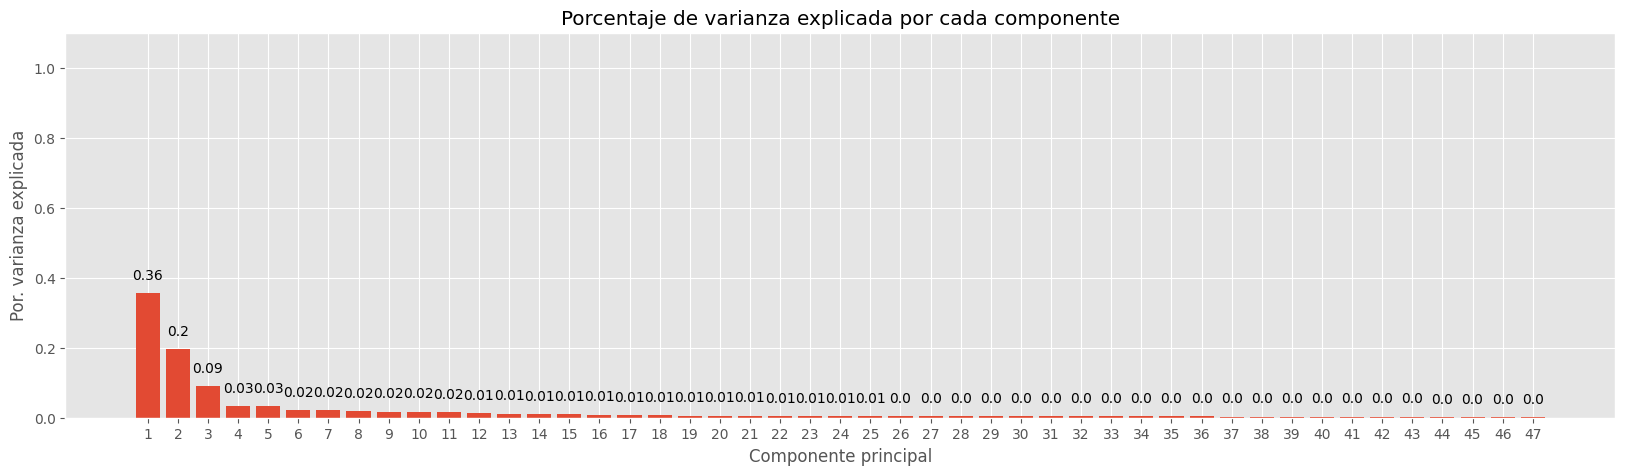

In [16]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datosML.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.35640813 0.55229109 0.64171596 0.6746045  0.70707634 0.72934759
 0.75081837 0.76867021 0.78572193 0.8027153  0.81816706 0.83086346
 0.842171   0.8522738  0.86196104 0.87040385 0.87785119 0.88496405
 0.89127487 0.89746012 0.90305161 0.90857384 0.91381462 0.91893976
 0.92399027 0.92890028 0.9335033  0.93792575 0.94221423 0.94646067
 0.95056954 0.95459118 0.95855208 0.96234441 0.96599529 0.96952499
 0.9727878  0.9759234  0.97904298 0.98208478 0.98509591 0.98799164
 0.99080433 0.99342483 0.99581146 0.99810906 1.        ]


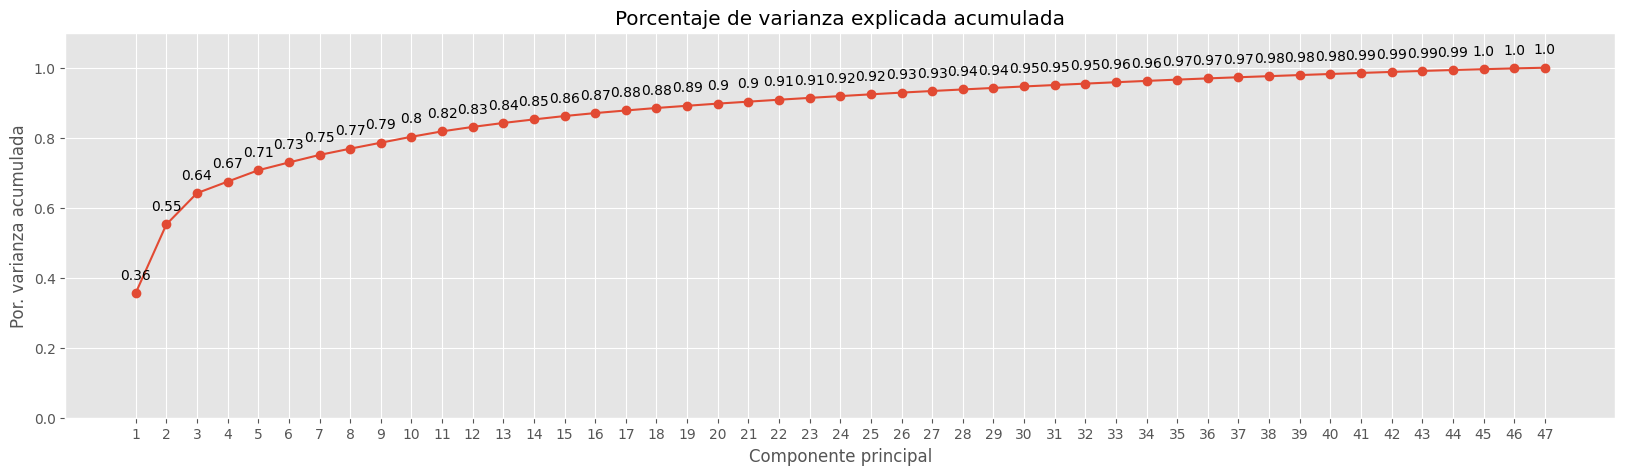

In [17]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
ax.plot(
    np.arange(len(datosML.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datosML.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

<Axes: >

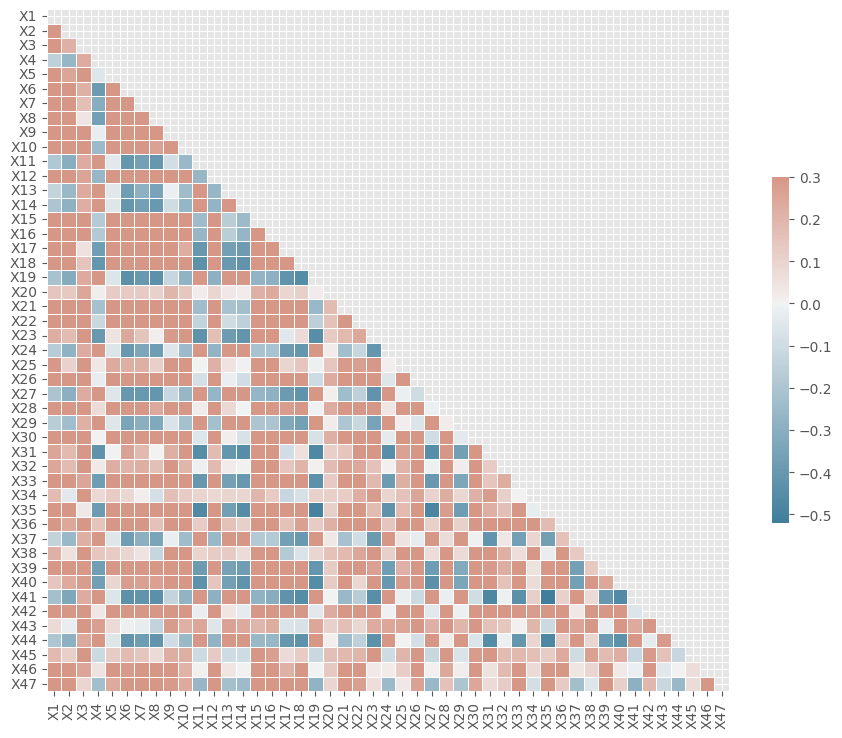

In [59]:
#Matriz de correlación de las variables (verificar que haya correlacion 
#entre variables para aplicar PCA)
corr = datosML.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
#Estandarización de datos
scaler = StandardScaler()
data = scaler.fit_transform(datosML)
data = pd.DataFrame(data)

In [20]:
#PCA
pca = PCA(n_components=10)
pca.fit(data)
datos_transformados = pca.transform(data)

In [21]:
nombres = [f'PC{i}' for i in range (1,11)]
df = pd.DataFrame(datos_transformados,columns=nombres)
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.087444,2.807989,-2.086392,1.481371,-0.435224,1.019149,0.032919,1.733044,0.360414,0.836731
1,5.093016,13.281897,-2.251610,-0.801702,-1.708984,1.413187,2.013486,1.175389,-0.175907,0.388101
2,-5.131197,2.392532,1.250335,-0.043670,-1.558008,-0.791208,-1.237164,-2.042526,-0.873948,-1.350552
3,-6.083651,1.849415,-1.026678,0.562456,-1.559269,0.548639,-0.753663,-0.326326,0.609743,-0.454720
4,6.938759,12.352034,-2.030830,-0.594404,-2.212110,0.594623,2.211134,0.209935,-0.235510,-0.073269


# **Modelos** ⏏ 

In [23]:
#Busqueda de numero de clusters
lista_a = []
for i in range(1,11):
	kmeans = KMeans(n_clusters = i)
	kmeans.fit(df)
	lista_a.append(kmeans.inertia_)

*El método del codo muestra que el número de clústers mas eficaces es 3*

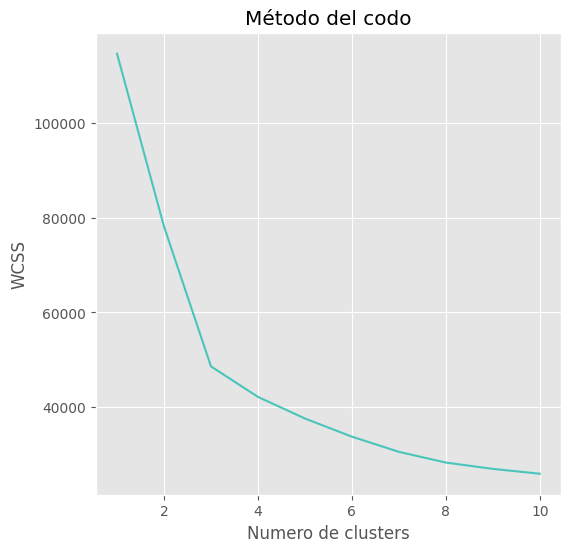

In [60]:
plt.figure(figsize=(6, 6))
plt.plot(range(1,11),lista_a, color='#4AC5BB')
plt.title('Método del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

## **1. MiniBatch KMeans**

In [25]:
from sklearn.cluster import MiniBatchKMeans
MBdf = df.copy()
MBKM = MiniBatchKMeans(init ='k-means++', n_clusters = 3,
                      batch_size = 45, n_init = 10,
                      max_no_improvement = 10, verbose = 0)
MBKM.fit(MBdf)

MiniBatchKMeans(batch_size=45, n_clusters=3, n_init=10)

In [63]:
print('El score de silueta de MiniBatch K-Means es',round(silhouette_score(MBdf,MBKM.labels_),4))

El score de silueta de MiniBatch K-Means es 0.3672


## **2. Affinity Propagation**

In [27]:
from sklearn.cluster import AffinityPropagation

APdf = df.copy()
AffP = AffinityPropagation(damping=0.9 ,affinity='euclidean' ,verbose=0, preference= -1000)
AffP.fit(APdf)

AffinityPropagation(damping=0.9, preference=-1000, verbose=0)

In [64]:
print('El score de silueta de Affinity Propagation es',round(silhouette_score(APdf,AffP.labels_, metric="sqeuclidean"),4))

El score de silueta de Affinity Propagation es 0.316


## **3. Spectral Clustering**

In [29]:
from sklearn.cluster import SpectralClustering

Scdf = df.copy()
SC = SpectralClustering(n_clusters=3, affinity='rbf', assign_labels='kmeans')
SC.fit(Scdf)

SpectralClustering(n_clusters=3)

In [65]:
print('El score de silueta de Spectral Clustering es',round(silhouette_score(Scdf,SC.labels_),4))

El score de silueta de Spectral Clustering es 0.4336


## **4. Ward**

In [31]:
from sklearn.cluster import AgglomerativeClustering

AggCdf = df.copy()
AggCL = AgglomerativeClustering(n_clusters = 3)
AggCL.fit(AggCdf) 

AgglomerativeClustering(n_clusters=3)

In [66]:
print('El score de silueta de Ward es',round(silhouette_score(AggCdf,AggCL.labels_),4))

El score de silueta de Ward es 0.3601


## **5. Gaussian Mixture Model (EM)**

In [35]:
EMdf = df.copy()
EM = GaussianMixture(n_components=3,init_params='k-means++')
EM.fit(EMdf)
EMclustering = EM.predict(EMdf)

In [67]:
#Dataframe EM
EMdf['EM_clustering'] = EMclustering
EMdf.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,EM_clustering
0,-6.087444,2.807989,-2.086392,1.481371,-0.435224,1.019149,0.032919,1.733044,0.360414,0.836731,0
1,5.093016,13.281897,-2.251610,-0.801702,-1.708984,1.413187,2.013486,1.175389,-0.175907,0.388101,1
2,-5.131197,2.392532,1.250335,-0.043670,-1.558008,-0.791208,-1.237164,-2.042526,-0.873948,-1.350552,0


In [68]:
print('El score de silueta de Expectation Maximization es',round(silhouette_score(EMdf,EMclustering),4))

El score de silueta de Expectation Maximization es 0.3624
